# CSI5155 Machine Learning Assignment 1

This notebook is only for evaluating models from an existing machine learning pipeline.

## Installing Prerequisites and Dependencies

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install joblib
%pip install matplotlib
%pip install imblearn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd;
import numpy as np;
from models import Models;
import constants;
from fileOrganizer import unpack, organize;
import performance;
from balancer import underSample, overSample;

## Obtain Models and Data from files

### Unpacking Model files

In [3]:
# choc dataset
choco_decisionTree = unpack(constants.filepaths["choc_posttrained_decisionTree"]);
choco_gradientBoost = unpack(constants.filepaths["choc_posttrained_gradientBoost"]);
choco_KNN = unpack(constants.filepaths["choc_posttrained_KNN"]);
choco_MLP = unpack(constants.filepaths["choc_posttrained_MLP"]);
choco_randomForst = unpack(constants.filepaths["choc_posttrained_randomForest"]);
choco_SVC = unpack(constants.filepaths["choc_posttrained_SVC"]);

# mushrooms dataset
mushrooms_decisionTree = unpack(constants.filepaths["mushrooms_posttrained_decisionTree"]);
mushrooms_gradientBoost = unpack(constants.filepaths["mushrooms_posttrained_gradientBoost"]);
mushrooms_KNN = unpack(constants.filepaths["mushrooms_posttrained_KNN"]);
mushrooms_MLP = unpack(constants.filepaths["mushrooms_posttrained_MLP"]);
mushrooms_randomForest = unpack(constants.filepaths["mushrooms_posttrained_randomForest"]);
mushrooms_SVC = unpack(constants.filepaths["mushrooms_posttrained_SVC"]);

In [4]:
# Verify data
print(f"Decision Tree classifier - for Chocolate dataset: {choco_decisionTree}");
print(f"Decision Tree classifier - for Mushrooms dataset: {mushrooms_decisionTree}");
print(f"Gradient Boosting classifier - for Chocolate dataset: {choco_gradientBoost}");
print(f"Gradient Boosting classifier - for Mushrooms dataset: {mushrooms_gradientBoost}");
print(f"KNN classifier - for Chocolate dataset: {choco_KNN}");
print(f"KNN classifier - for Mushrooms dataset: {mushrooms_KNN}");
print(f"MLP classifier - for Chocolate dataset: {choco_MLP}");
print(f"MLP classifier - for Mushrooms dataset: {mushrooms_MLP}");
print(f"Random Forest classifier - for Chocolate dataset: {choco_randomForst}");
print(f"Random Forest classifier - for Mushrooms dataset: {mushrooms_randomForest}");
print(f"SVM classifier - for Chocolate dataset: {choco_SVC}");
print(f"SVM classifier - for Mushrooms dataset: {mushrooms_SVC}");


Decision Tree classifier - for Chocolate dataset: RandomizedSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    splitter='random'),
                   param_distributions={'max_depth': array([14, 12, 15,  8,  4,  7,  8, 11, 10, 18, 18, 17, 10,  2,  4,  9, 19,
       12, 10, 10,  8, 19,  9,  1, 17, 16,  7, 12, 11,  6, 18, 18, 10, 11,
       19, 14,  4, 16, 15, 17, 13, 12, 19,  1,  7, 15, 13, 13,  5,  4,  2,
       17, 19, 19, 16,  2,  3, 10, 13,  6,  2, 17,  3,  8,  6, 13,  1, 18,
        3,  5, 16,  2,  4,  4,  5,  3,  2, 17,  4, 19,  3,  9,  1,  7,  4,
        3,  1, 12,  4, 18,  7, 19,  7, 16, 19, 19, 11,  8, 17, 16],
      dtype=int64),
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027F12082CB0>},
                   random_state=42)
Decision Tree classifier - for Mushrooms dataset: RandomizedSearchCV(estimator=DecisionTreeClassifier(cr

### Unpacking Test Set data

In [5]:
# choc dataset
choco_X_test = unpack(constants.filepaths["choc_test-set_samples"]);
choco_y_test = unpack(constants.filepaths["choc_test-set_labels"]);

# mushrooms dataset
mushrooms_X_test = unpack(constants.filepaths["mushrooms_test-set_samples"]);
mushrooms_y_test = unpack(constants.filepaths["mushrooms_test-set_labels"]);

Verifying the data

In [6]:
# choc dataset
# Samples Array
print(f"Type of samples array - for Chocolate dataset: {type(choco_X_test)}");
print(f"Shape of samples array - for Chocolate dataset: {choco_X_test.shape}");
print(f"Dimensionality of samples array - for Chocolate dataset: {choco_X_test.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(choco_y_test)}");
print(f"Shape of labels array - for Chocolate dataset: {choco_y_test.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {choco_y_test.ndim}");

print();

# mushrooms dataset
# Samples array
print(f"Type of samples array - for Mushrooms dataset: {type(mushrooms_X_test)}");
print(f"Shape of samples array - for Mushrooms dataset: {mushrooms_X_test.shape}");
print(f"Dimensionality of samples array - for Mushrooms dataset: {mushrooms_X_test.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(mushrooms_y_test)}");
print(f"Shape of labels array - for Chocolate dataset: {mushrooms_y_test.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {mushrooms_y_test.ndim}");

Type of samples array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of samples array - for Chocolate dataset: (629, 13)
Dimensionality of samples array - for Chocolate dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (629,)
Dimensionality of labels array - for Chocolate dataset: 1

Type of samples array - for Mushrooms dataset: <class 'numpy.ndarray'>
Shape of samples array - for Mushrooms dataset: (629, 13)
Dimensionality of samples array - for Mushrooms dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (629,)
Dimensionality of labels array - for Chocolate dataset: 1


### Unpacking Training Set data

In [7]:
# choc dataset
choco_X_train = unpack(constants.filepaths["choc_train-set_samples"]);
choco_y_train = unpack(constants.filepaths["choc_train-set_labels"]);

# mushrooms dataset
mushrooms_X_train = unpack(constants.filepaths["mushrooms_train-set_samples"]);
mushrooms_y_train = unpack(constants.filepaths["mushrooms_train-set_labels"]);

In [8]:
# choc dataset
# Samples Array
print(f"Type of samples array - for Chocolate dataset: {type(choco_X_train)}");
print(f"Shape of samples array - for Chocolate dataset: {choco_X_train.shape}");
print(f"Dimensionality of samples array - for Chocolate dataset: {choco_X_train.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(choco_y_train)}");
print(f"Shape of labels array - for Chocolate dataset: {choco_y_train.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {choco_y_train.ndim}");

print();

# mushrooms dataset
# Samples array
print(f"Type of samples array - for Mushrooms dataset: {type(mushrooms_X_train)}");
print(f"Shape of samples array - for Mushrooms dataset: {mushrooms_X_train.shape}");
print(f"Dimensionality of samples array - for Mushrooms dataset: {mushrooms_X_train.ndim}");

print();

# Labels Array
print(f"Type of labels array - for Chocolate dataset: {type(mushrooms_y_train)}");
print(f"Shape of labels array - for Chocolate dataset: {mushrooms_y_train.shape}");
print(f"Dimensionality of labels array - for Chocolate dataset: {mushrooms_y_train.ndim}");

Type of samples array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of samples array - for Chocolate dataset: (1256, 13)
Dimensionality of samples array - for Chocolate dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (1256,)
Dimensionality of labels array - for Chocolate dataset: 1

Type of samples array - for Mushrooms dataset: <class 'numpy.ndarray'>
Shape of samples array - for Mushrooms dataset: (1256, 13)
Dimensionality of samples array - for Mushrooms dataset: 2

Type of labels array - for Chocolate dataset: <class 'numpy.ndarray'>
Shape of labels array - for Chocolate dataset: (1256,)
Dimensionality of labels array - for Chocolate dataset: 1


In [9]:
# Combine all models into a pipeline for both datasets respectively
# choc dataset
chocoModels = Models(
    decisionTree_clf=choco_decisionTree,
    randomForest_clf=choco_randomForst,
    svm_clf=choco_SVC,
    gradientBoost_clf=choco_gradientBoost,
    mlp_clf=choco_MLP,
    knn_clf=choco_KNN
);

chocoModels.set_X_train(choco_X_train);
chocoModels.set_X_test(choco_X_test);
chocoModels.set_y_train(choco_y_train);
chocoModels.set_y_test(choco_y_test);

# Normalize
chocoModels.normalize();

chocoModels.getModels(
    constants.descisionTree, # Single Decision Tree classifier
    constants.randForest, # Random Forest classifier
    constants.svm, # Support Vector Machine (SVM) classifier - SVC with RBF
    constants.gradientBoost, # gradient boosting (GB) ensemble
    constants.mlp, # multi-layer perceptron (MLP) classifier
    constants.knn # k‐nearest neighbour (k-NN) classifier
);
print(chocoModels);

In [10]:
# Combine all models into a pipeline for both datasets respectively
# choc dataset
mushModels = Models(
    decisionTree_clf=mushrooms_decisionTree,
    randomForest_clf=mushrooms_randomForest,
    svm_clf=mushrooms_SVC,
    gradientBoost_clf=mushrooms_gradientBoost,
    mlp_clf=mushrooms_MLP,
    knn_clf=mushrooms_KNN
);

mushModels.set_X_train(choco_X_train);
mushModels.set_X_test(choco_X_test);
mushModels.set_y_train(choco_y_train);
mushModels.set_y_test(choco_y_test);

# Normalize 
mushModels.normalize();

mushModels.getModels(
    constants.descisionTree, # Single Decision Tree classifier
    constants.randForest, # Random Forest classifier
    constants.svm, # Support Vector Machine (SVM) classifier - SVC with RBF
    constants.gradientBoost, # gradient boosting (GB) ensemble
    constants.mlp, # multi-layer perceptron (MLP) classifier
    constants.knn # k‐nearest neighbour (k-NN) classifier
);
print(mushModels);

## Evaluating Performance Metrics from test set

### Decision Tree classifier

In [11]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_decisionTree:np.ndarray = Models.predict(
    model=chocoModels.decisionTree_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_decisionTree = performance.evalPredictionNum(
    y_pred=choc_y_pred_decisionTree,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_decisionTree}");

# Evaluations
precision_choc_decisionTree = performance.evalPrecision(
    y_pred=choc_y_pred_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_decisionTree}");

recall_choc_decisionTree = performance.evalRecall(
    y_pred=choc_y_pred_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_decisionTree, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [12]:
# mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_decisionTree:np.ndarray = Models.predict(
    model=mushModels.decisionTree_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_decisionTree = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_decisionTree,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_decisionTree}");

# Evaluations
precision_mushrooms_decisionTree = performance.evalPrecision(
    y_pred=mushrooms_y_pred_decisionTree, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_decisionTree}");

recall_mushrooms_decisionTree = performance.evalRecall(
    y_pred=mushrooms_y_pred_decisionTree, 
    y_test=mushModels.y_test);
print(f"Recall: {precision_mushrooms_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_decisionTree, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9883720930232558
Recall: 0.9883720930232558


Predicted,user,non-user,All
Actual,,,
user,170,451,621
non-user,2,6,8
All,172,457,629


### Random Forest classifier

In [13]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_randomForst:np.ndarray = Models.predict(
    model=chocoModels.randomForest_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_randomForest = performance.evalPredictionNum(
    y_pred=choc_y_pred_randomForst,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_randomForest}");

# Evaluations
precision_choc_randomForest = performance.evalPrecision(
    y_pred=choc_y_pred_randomForst, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_randomForest}");

recall_choc_randomForest = performance.evalRecall(
    y_pred=choc_y_pred_randomForst, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_randomForst, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [14]:
# mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_randomForst:np.ndarray = Models.predict(
    model=mushModels.randomForest_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_randomForest = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_randomForst,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_randomForest}");

# Evaluations
precision_mushrooms_randomForest = performance.evalPrecision(
    y_pred=mushrooms_y_pred_randomForst, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_randomForest}");

recall_mushrooms_randomForest = performance.evalRecall(
    y_pred=mushrooms_y_pred_randomForst, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_randomForst, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9822222222222222
Recall: 0.355877616747182


Predicted,user,non-user,All
Actual,,,
user,221,400,621
non-user,4,4,8
All,225,404,629


### SVM classifier

In [15]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_svm:np.ndarray = Models.predict(
    model=chocoModels.svm_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_svm = performance.evalPredictionNum(
    y_pred=choc_y_pred_svm,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_svm}");

# Evaluations
precision_choc_svm = performance.evalPrecision(
    y_pred=choc_y_pred_svm, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_svm}");

recall_choc_svm = performance.evalRecall(
    y_pred=choc_y_pred_svm, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_svm}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_svm, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [16]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_svm:np.ndarray = Models.predict(
    model=mushModels.svm_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_svm = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_svm,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_svm}");

# Evaluations
precision_mushrooms_svm = performance.evalPrecision(
    y_pred=mushrooms_y_pred_svm, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_svm}");

recall_mushrooms_svm = performance.evalRecall(
    y_pred = mushrooms_y_pred_svm, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_svm}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_svm, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9833333333333333
Recall: 0.38003220611916266


Predicted,user,non-user,All
Actual,,,
user,236,385,621
non-user,4,4,8
All,240,389,629


### Gradient Boosting classifier

In [17]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_gradientBoost:np.ndarray = Models.predict(
    model=chocoModels.gradientBoost_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_gradientBoost = performance.evalPredictionNum(
    y_pred=choc_y_pred_gradientBoost,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_gradientBoost}");

# Evaluations
precision_choc_gradientBoost = performance.evalPrecision(
    y_pred=choc_y_pred_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_gradientBoost}");

recall_choc_gradientBoost = performance.evalRecall(
    y_pred=choc_y_pred_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_gradientBoost, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.987220447284345
Recall: 0.9951690821256038


Predicted,user,non-user,All
Actual,,,
user,618,3,621
non-user,8,0,8
All,626,3,629


In [18]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_gradientBoost:np.ndarray = Models.predict(
    model=mushModels.gradientBoost_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_gradientBoost = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_gradientBoost,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_gradientBoost}");

# Evaluations
precision_mushrooms_gradientBoost = performance.evalPrecision(
    y_pred=mushrooms_y_pred_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_gradientBoost}");

recall_mushrooms_gradientBoost = performance.evalRecall(
    y_pred = mushrooms_y_pred_gradientBoost, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_gradientBoost, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9768518518518519
Recall: 0.3397745571658615


Predicted,user,non-user,All
Actual,,,
user,211,410,621
non-user,5,3,8
All,216,413,629


### MLP classifier

In [19]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_mlp:np.ndarray = Models.predict(
    model=chocoModels.mlp_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_mlp = performance.evalPredictionNum(
    y_pred=choc_y_pred_mlp,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_mlp}");

# Evaluations
precision_choc_mlp = performance.evalPrecision(
    y_pred=choc_y_pred_mlp, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_mlp}");

recall_choc_mlp = performance.evalRecall(
    y_pred=choc_y_pred_mlp, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_mlp}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_mlp, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872
Recall: 0.9935587761674718


Predicted,user,non-user,All
Actual,,,
user,617,4,621
non-user,8,0,8
All,625,4,629


In [20]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_mlp:np.ndarray = Models.predict(
    model=mushModels.mlp_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_mlp = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_mlp,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_mlp}");

# Evaluations
precision_mushrooms_mlp = performance.evalPrecision(
    y_pred=mushrooms_y_pred_mlp, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_mlp}");

recall_mushrooms_mlp = performance.evalRecall(
    y_pred = mushrooms_y_pred_mlp, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_mlp}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_mlp, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9823008849557522
Recall: 0.357487922705314


Predicted,user,non-user,All
Actual,,,
user,222,399,621
non-user,4,4,8
All,226,403,629


### KNN classifier

In [21]:
# choc dataset
print("Chocolate Dataset");

choc_y_pred_knn:np.ndarray = Models.predict(
    model=chocoModels.knn_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_knn = performance.evalPredictionNum(
    y_pred=choc_y_pred_knn,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_knn}");

# Evaluations
precision_choc_knn = performance.evalPrecision(
    y_pred=choc_y_pred_knn, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_knn}");

recall_choc_knn = performance.evalRecall(
    y_pred=choc_y_pred_knn, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_knn}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_knn, chocoModels.y_test);
confMtx

Chocolate Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872813990461049
Recall: 1.0


Predicted,user,non-user,All
Actual,,,
user,621.0,0.0,621.0
non-user,8.0,0.0,8.0
All,629.0,0.0,629.0


In [22]:
# Mushrooms dataset
print("Mushrooms Dataset");

mushrooms_y_pred_knn:np.ndarray = Models.predict(
    model=mushModels.knn_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_knn = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_knn,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_knn}");

# Evaluations
precision_mushrooms_knn = performance.evalPrecision(
    y_pred=mushrooms_y_pred_knn, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_knn}");

recall_mushrooms_knn = performance.evalRecall(
    y_pred = mushrooms_y_pred_knn, 
    y_test= mushModels.y_test);
print(f"Recall: {recall_mushrooms_knn}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_knn, mushModels.y_test);
confMtx

Mushrooms Dataset
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9835390946502057
Recall: 0.38486312399355876


Predicted,user,non-user,All
Actual,,,
user,239,382,621
non-user,4,4,8
All,243,386,629


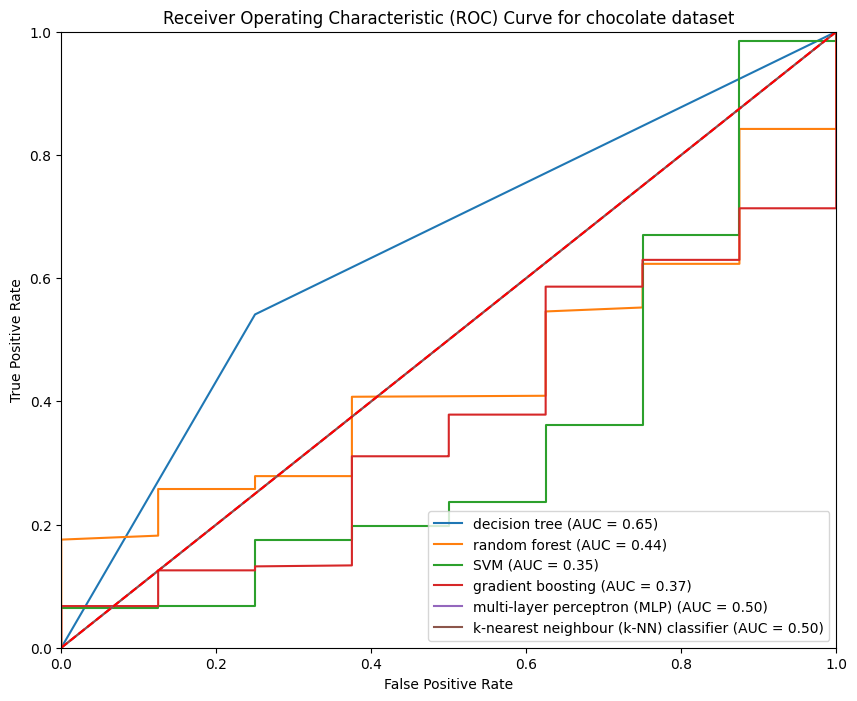

In [23]:
# plot the ROC and store the AUC for further analysis
AUCs_chocolate = [];
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: chocoModels.decisionTree_clf,
        constants.randForest: chocoModels.randomForest_clf,
        constants.svm: chocoModels.svm_clf,
        constants.gradientBoost: chocoModels.gradientBoost_clf,
        constants.mlp: chocoModels.mlp_clf,
        constants.knn: chocoModels.knn_clf
    },
    X_test=choco_X_test,
    y_test=chocoModels.y_test,
    dataset=constants.choco_dataset_fullname
);
AUCs_chocolate += currAUCs;

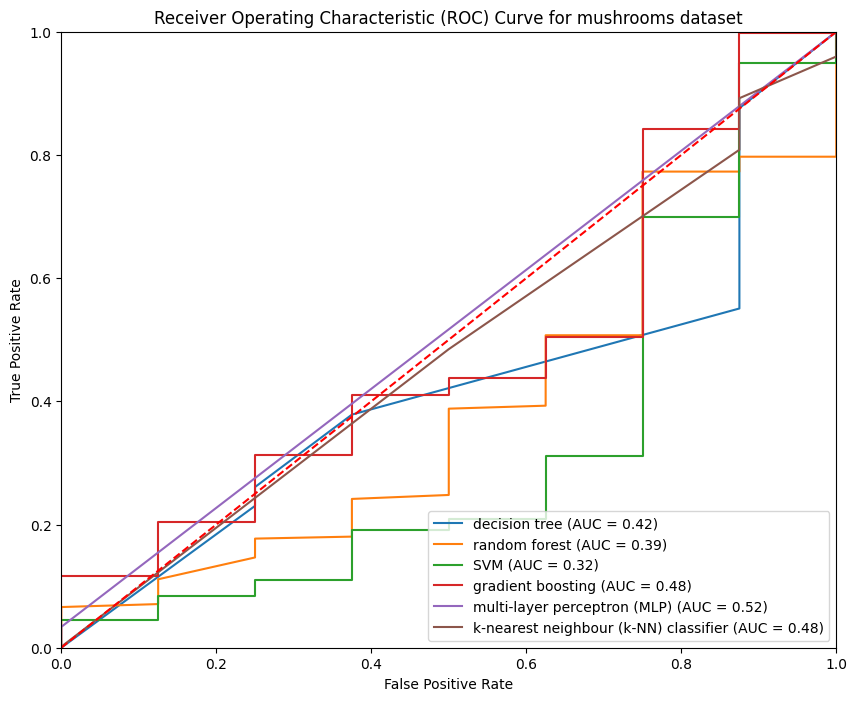

In [24]:
# plot the ROC and store the AUC for further analysis
AUCs_mushrooms = [];
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: mushModels.decisionTree_clf,
        constants.randForest: mushModels.randomForest_clf,
        constants.svm: mushModels.svm_clf,
        constants.gradientBoost: mushModels.gradientBoost_clf,
        constants.mlp: mushModels.mlp_clf,
        constants.knn: mushModels.knn_clf
    },
    X_test=mushrooms_X_test,
    y_test=mushModels.y_test,
    dataset=constants.mushrooms_dataset
);
AUCs_mushrooms += currAUCs;

## Addressing the Issue of Class Imbalance

### Chocolate Dataset

First, we identify the majority class from the test set.

In [25]:
# chocolate dataset
print(pd.Series(choco_y_test).value_counts());

user        621
non-user      8
dtype: int64


Obviously, the `user` class is a majority class, while `non-user` is the minority class.

#### Undersample the majority class (from the training set)

In [26]:
choco_X_train_underSample, choco_y_train_underSample = underSample(
    X_train=chocoModels.X_train, # use the normalized samples
    y_train=chocoModels.y_train # use the normalized labels
);
print(f"Total Number of Samples: {len(choco_X_train_underSample)}");
print(f"Total Number of Labels: {len(choco_y_train_underSample)}");
print(f"Unique Labels: {np.unique(choco_y_train_underSample)}");

Total Number of Samples: 81
Total Number of Labels: 81
Unique Labels: [0 1]


##### Employ the 6 models

In [27]:
# Change the training data for the models
chocoModels.set_X_train(choco_X_train_underSample);
chocoModels.set_y_train(choco_y_train_underSample);

In [28]:
# retrain all models with undersampled data
chocoModels.train(
    dataset=constants.choco_dataset,
    isSampled=constants.undersampled
);

Training all models
All models are completely trained.


In [29]:
# organize files into directories
organize();

Moved choc_model_decisionTree_posttrained_undersampled.pkl to ./choc\posttrained
Moved choc_model_Gradient_Boosting_posttrained_undersampled.pkl to ./choc\posttrained
Moved choc_model_KNN_posttrained_undersampled.pkl to ./choc\posttrained
Moved choc_model_MLP_posttrained_undersampled.pkl to ./choc\posttrained
Moved choc_model_randomForest_posttrained_undersampled.pkl to ./choc\posttrained
Moved choc_model_SVC_RBF_posttrained_undersampled.pkl to ./choc\posttrained
Moved mushrooms_model_decisionTree_posttrained_combinedsampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_Gradient_Boosting_posttrained_combinedsampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_KNN_posttrained_combinedsampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_MLP_posttrained_combinedsampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_randomForest_posttrained_combinedsampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_SVC_RBF_posttrained_combinedsampled.pkl to ./mushroom

##### Make Predictions on the test set

In [30]:
# Decision Tree
print("Decision Tree");

choc_y_pred_undersampled_decisionTree:np.ndarray = Models.predict(
    model=chocoModels.decisionTree_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_decisionTree = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_decisionTree,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_decisionTree}");

# Evaluations
precision_choc_decisionTree = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_decisionTree}");

recall_choc_decisionTree = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_decisionTree, chocoModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9865996649916248
Recall: 0.9484702093397746


Predicted,user,non-user,All
Actual,,,
user,589,32,621
non-user,8,0,8
All,597,32,629


In [31]:
# Random Forest
print("Random Forest");

choc_y_pred_undersampled_randomForest:np.ndarray = Models.predict(
    model=chocoModels.randomForest_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_randomForest = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_randomForest,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_randomForest}");

# Evaluations
precision_choc_randomForest = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_randomForest, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_randomForest}");

recall_choc_randomForest = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_randomForest, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_randomForest, chocoModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9917525773195877
Recall: 0.7745571658615137


Predicted,user,non-user,All
Actual,,,
user,481,140,621
non-user,4,4,8
All,485,144,629


In [32]:
# SVM
print("SVM");

choc_y_pred_undersampled_SVM:np.ndarray = Models.predict(
    model=chocoModels.svm_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_SVM = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_SVM,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_SVM}");

# Evaluations
precision_choc_SVM = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_SVM}");

recall_choc_SVM = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_SVM, chocoModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9857397504456328
Recall: 0.8904991948470209


Predicted,user,non-user,All
Actual,,,
user,553,68,621
non-user,8,0,8
All,561,68,629


In [33]:
# Gradient Boosting
print("Gradient Boosting");

choc_y_pred_undersampled_gradientBoost:np.ndarray = Models.predict(
    model=chocoModels.gradientBoost_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_gradientBoost = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_gradientBoost,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_gradientBoost}");

# Evaluations
precision_choc_gradientBoost = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_gradientBoost}");

recall_choc_gradientBoost = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_gradientBoost, chocoModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9894957983193278
Recall: 0.7584541062801933


Predicted,user,non-user,All
Actual,,,
user,471,150,621
non-user,5,3,8
All,476,153,629


In [34]:
# MLP
print("MLP");

choc_y_pred_undersampled_MLP:np.ndarray = Models.predict(
    model=chocoModels.mlp_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_MLP = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_MLP,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_MLP}");

# Evaluations
precision_choc_MLP = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_MLP, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_MLP}");

recall_choc_MLP = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_MLP, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_MLP, chocoModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.986
Recall: 0.7938808373590982


Predicted,user,non-user,All
Actual,,,
user,493,128,621
non-user,7,1,8
All,500,129,629


In [35]:
# KNN
print("KNN");

choc_y_pred_undersampled_KNN:np.ndarray = Models.predict(
    model=chocoModels.knn_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_undersampled_KNN = performance.evalPredictionNum(
    y_pred=choc_y_pred_undersampled_KNN,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_undersampled_KNN}");

# Evaluations
precision_choc_KNN = performance.evalPrecision(
    y_pred=choc_y_pred_undersampled_KNN, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_KNN}");

recall_choc_KNN = performance.evalRecall(
    y_pred=choc_y_pred_undersampled_KNN, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_undersampled_KNN, chocoModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9861111111111112
Recall: 0.9146537842190016


Predicted,user,non-user,All
Actual,,,
user,568,53,621
non-user,8,0,8
All,576,53,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using undersampled data

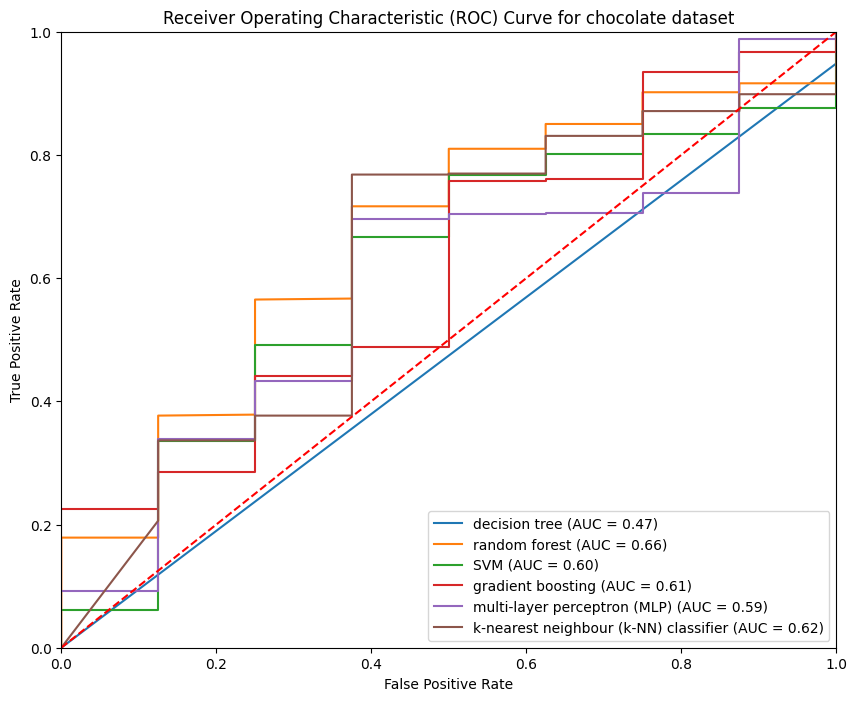

In [36]:
# plot the ROC and store the AUC for further analysis
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: chocoModels.decisionTree_clf,
        constants.randForest: chocoModels.randomForest_clf,
        constants.svm: chocoModels.svm_clf,
        constants.gradientBoost: chocoModels.gradientBoost_clf,
        constants.mlp: chocoModels.mlp_clf,
        constants.knn: chocoModels.knn_clf
    },
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test,
    dataset=constants.choco_dataset_fullname
);
AUCs_chocolate += currAUCs;

#### Oversample the minority class (from the training set)

In [37]:
choco_X_train_overSample, choco_y_train_overSample = overSample(
    X_train=chocoModels.X_train, # use the normalized samples
    y_train=chocoModels.y_train # use the normalized labels
);
print(f"Total Number of Samples: {len(choco_X_train_overSample)}");
print(f"Total Number of Labels: {len(choco_y_train_overSample)}");
print(f"Unique Labels: {np.unique(choco_y_train_overSample)}");

Total Number of Samples: 108
Total Number of Labels: 108
Unique Labels: [0 1]


##### Employ the 6 models

In [38]:
# Change the training data for the models
chocoModels.set_X_train(choco_X_train_overSample);
chocoModels.set_y_train(choco_y_train_overSample);

In [39]:
# retrain all models with oversampled data
chocoModels.train(
    dataset=constants.choco_dataset,
    isSampled=constants.oversampled
);

Training all models
All models are completely trained.


In [40]:
# organize files into directories
organize();

Moved choc_model_decisionTree_posttrained_oversampled.pkl to ./choc\posttrained
Moved choc_model_Gradient_Boosting_posttrained_oversampled.pkl to ./choc\posttrained
Moved choc_model_KNN_posttrained_oversampled.pkl to ./choc\posttrained
Moved choc_model_MLP_posttrained_oversampled.pkl to ./choc\posttrained
Moved choc_model_randomForest_posttrained_oversampled.pkl to ./choc\posttrained
Moved choc_model_SVC_RBF_posttrained_oversampled.pkl to ./choc\posttrained
Organization complete!


##### Make Predictions on the test set

In [41]:
# Decision Tree
print("Decision Tree");

choc_y_pred_oversampled_decisionTree:np.ndarray = Models.predict(
    model=chocoModels.decisionTree_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_decisionTree = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_decisionTree,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_decisionTree}");

# Evaluations
precision_choc_decisionTree = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_decisionTree}");

recall_choc_decisionTree = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_decisionTree, chocoModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9872881355932204
Recall: 0.750402576489533


Predicted,user,non-user,All
Actual,,,
user,466,155,621
non-user,6,2,8
All,472,157,629


In [42]:
# Random Forest
print("Random Forest");

choc_y_pred_oversampled_randomForest:np.ndarray = Models.predict(
    model=chocoModels.randomForest_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_randomForest = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_randomForest,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_randomForest}");

# Evaluations
precision_choc_randomForest = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_randomForest, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_randomForest}");

recall_choc_randomForest = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_randomForest, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_randomForest, chocoModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9886104783599089
Recall: 0.6988727858293076


Predicted,user,non-user,All
Actual,,,
user,434,187,621
non-user,5,3,8
All,439,190,629


In [43]:
# SVM
print("SVM");

choc_y_pred_oversampled_SVM:np.ndarray = Models.predict(
    model=chocoModels.svm_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_SVM = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_SVM,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_SVM}");

# Evaluations
precision_choc_SVM = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_SVM}");

recall_choc_SVM = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_SVM, chocoModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.985655737704918
Recall: 0.7745571658615137


Predicted,user,non-user,All
Actual,,,
user,481,140,621
non-user,7,1,8
All,488,141,629


In [44]:
# Gradient Boosting
print("Gradient Boosting");

choc_y_pred_oversampled_gradientBoost:np.ndarray = Models.predict(
    model=chocoModels.gradientBoost_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_gradientBoost = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_gradientBoost,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_gradientBoost}");

# Evaluations
precision_choc_gradientBoost = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_gradientBoost}");

recall_choc_gradientBoost = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_gradientBoost, chocoModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9858156028368794
Recall: 0.6714975845410628


Predicted,user,non-user,All
Actual,,,
user,417,204,621
non-user,6,2,8
All,423,206,629


In [45]:
# MLP
print("MLP");

choc_y_pred_oversampled_MLP:np.ndarray = Models.predict(
    model=chocoModels.mlp_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_MLP = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_MLP,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_MLP}");

# Evaluations
precision_choc_MLP = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_MLP, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_MLP}");

recall_choc_MLP = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_MLP, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_MLP, chocoModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9893617021276596
Recall: 0.748792270531401


Predicted,user,non-user,All
Actual,,,
user,465,156,621
non-user,5,3,8
All,470,159,629


In [46]:
# KNN
print("KNN");

choc_y_pred_oversampled_KNN:np.ndarray = Models.predict(
    model=chocoModels.knn_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_oversampled_KNN = performance.evalPredictionNum(
    y_pred=choc_y_pred_oversampled_KNN,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_oversampled_KNN}");

# Evaluations
precision_choc_KNN = performance.evalPrecision(
    y_pred=choc_y_pred_oversampled_KNN, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_KNN}");

recall_choc_KNN = performance.evalRecall(
    y_pred=choc_y_pred_oversampled_KNN, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_oversampled_KNN, chocoModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9905882352941177
Recall: 0.677938808373591


Predicted,user,non-user,All
Actual,,,
user,421,200,621
non-user,4,4,8
All,425,204,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using oversampled data

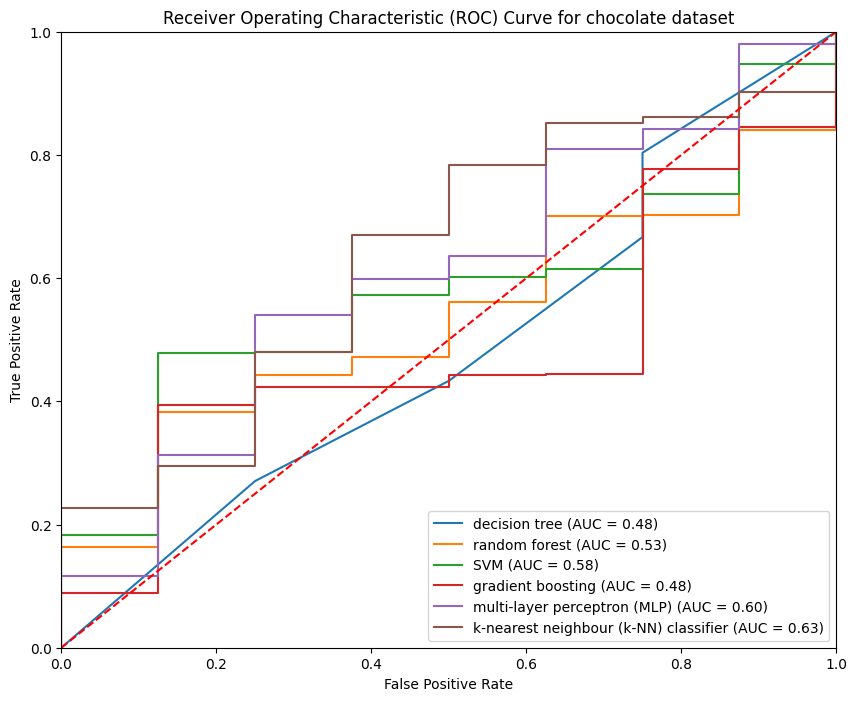

In [47]:
# plot the ROC and store the AUC for further analysis
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: chocoModels.decisionTree_clf,
        constants.randForest: chocoModels.randomForest_clf,
        constants.svm: chocoModels.svm_clf,
        constants.gradientBoost: chocoModels.gradientBoost_clf,
        constants.mlp: chocoModels.mlp_clf,
        constants.knn: chocoModels.knn_clf
    },
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test,
    dataset=constants.choco_dataset_fullname
);
AUCs_chocolate += currAUCs;

Load the Models trained by undersampled data and oversampled data respectively.

In [48]:
# Models trained with undersampled data
choco_undersampled_decisionTree = unpack(constants.filepaths["choc_posttrained_undersampled_decisionTree"]);
choco_undersampled_randomForest = unpack(constants.filepaths["choc_posttrained_undersampled_randomForest"]);
choco_undersampled_SVC = unpack(constants.filepaths["choc_posttrained_undersampled_SVC"]);
choco_undersampled_gradientBoost = unpack(constants.filepaths["choc_posttrained_undersampled_gradientBoost"]);
choco_undersampled_MLP = unpack(constants.filepaths["choc_posttrained_undersampled_MLP"]);
choco_undersampled_KNN = unpack(constants.filepaths["choc_posttrained_undersampled_KNN"]);
# Models trained with oversampled data
choco_oversampled_decisionTree = unpack(constants.filepaths["choc_posttrained_oversampled_decisionTree"]);
choco_oversampled_randomForest = unpack(constants.filepaths["choc_posttrained_oversampled_randomForest"]);
choco_oversampled_SVC = unpack(constants.filepaths["choc_posttrained_oversampled_SVC"]);
choco_oversampled_gradientBoost = unpack(constants.filepaths["choc_posttrained_oversampled_gradientBoost"]);
choco_oversampled_MLP = unpack(constants.filepaths["choc_posttrained_oversampled_MLP"]);
choco_oversampled_KNN = unpack(constants.filepaths["choc_posttrained_oversampled_KNN"]);

#### Training the model with combination of undersampling and oversampling

In [49]:
choco_X_train_combined = np.concatenate((choco_X_train_underSample, choco_X_train_overSample));
choco_y_train_combined = np.concatenate((choco_y_train_underSample, choco_y_train_overSample));
print(f"Total Number of Samples: {len(choco_X_train_combined)}");
print(f"Total Number of Labels: {len(choco_y_train_combined)}");
print(f"Unique Labels: {np.unique(choco_y_train_overSample)}");
print(f"Shape of training samples array: {choco_X_train_combined.shape}");
print(f"Shape of training labels array: {choco_y_train_combined.shape}");

Total Number of Samples: 189
Total Number of Labels: 189
Unique Labels: [0 1]
Shape of training samples array: (189, 13)
Shape of training labels array: (189,)


##### Employ the 6 models

In [50]:
# Change the training data for the models
chocoModels.set_X_train(choco_X_train_combined);
chocoModels.set_y_train(choco_y_train_combined);

In [51]:
# retrain all models with oversampled data
chocoModels.train(
    dataset=constants.choco_dataset,
    isSampled=constants.combinedsampled
);

Training all models
All models are completely trained.


##### Make Predictions on the test set

In [52]:
# Decision Tree
print("Decision Tree");

choc_y_pred_combined_decisionTree:np.ndarray = Models.predict(
    model=chocoModels.decisionTree_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_decisionTree = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_decisionTree,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_decisionTree}");

# Evaluations
precision_choc_decisionTree = performance.evalPrecision(
    y_pred=choc_y_pred_combined_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_decisionTree}");

recall_choc_decisionTree = performance.evalRecall(
    y_pred=choc_y_pred_combined_decisionTree, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_decisionTree, chocoModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9901234567901235
Recall: 0.6457326892109501


Predicted,user,non-user,All
Actual,,,
user,401,220,621
non-user,4,4,8
All,405,224,629


In [53]:
# Random Forest
print("Random Forest");

choc_y_pred_combined_randomForest:np.ndarray = Models.predict(
    model=chocoModels.randomForest_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_randomForest = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_randomForest,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_randomForest}");

# Evaluations
precision_choc_randomForest = performance.evalPrecision(
    y_pred=choc_y_pred_combined_randomForest, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_randomForest}");

recall_choc_randomForest = performance.evalRecall(
    y_pred=choc_y_pred_combined_randomForest, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_randomForest, chocoModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9886104783599089
Recall: 0.6988727858293076


Predicted,user,non-user,All
Actual,,,
user,434,187,621
non-user,5,3,8
All,439,190,629


In [54]:
# SVM
print("SVM");

choc_y_pred_combined_SVM:np.ndarray = Models.predict(
    model=chocoModels.svm_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_SVM = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_SVM,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_SVM}");

# Evaluations
precision_choc_SVM = performance.evalPrecision(
    y_pred=choc_y_pred_combined_SVM, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_SVM}");

recall_choc_SVM = performance.evalRecall(
    y_pred=choc_y_pred_combined_SVM, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_SVM, chocoModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9852941176470589
Recall: 0.7552334943639292


Predicted,user,non-user,All
Actual,,,
user,469,152,621
non-user,7,1,8
All,476,153,629


In [55]:
# Gradient Boosting
print("Gradient Boosting");

choc_y_pred_combined_gradientBoost:np.ndarray = Models.predict(
    model=chocoModels.gradientBoost_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_gradientBoost = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_gradientBoost,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_gradientBoost}");

# Evaluations
precision_choc_gradientBoost = performance.evalPrecision(
    y_pred=choc_y_pred_combined_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_gradientBoost}");

recall_choc_gradientBoost = performance.evalRecall(
    y_pred=choc_y_pred_combined_gradientBoost, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_gradientBoost, chocoModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9838337182448037
Recall: 0.6859903381642513


Predicted,user,non-user,All
Actual,,,
user,426,195,621
non-user,7,1,8
All,433,196,629


In [56]:
# MLP
print("MLP");

choc_y_pred_combined_MLP:np.ndarray = Models.predict(
    model=chocoModels.mlp_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_MLP = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_MLP,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_MLP}");

# Evaluations
precision_choc_MLP = performance.evalPrecision(
    y_pred=choc_y_pred_combined_MLP, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_MLP}");

recall_choc_MLP = performance.evalRecall(
    y_pred=choc_y_pred_combined_MLP, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_MLP, chocoModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9894957983193278
Recall: 0.7584541062801933


Predicted,user,non-user,All
Actual,,,
user,471,150,621
non-user,5,3,8
All,476,153,629


In [57]:
# KNN
print("KNN");

choc_y_pred_combined_KNN:np.ndarray = Models.predict(
    model=chocoModels.knn_clf, 
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test
);

print(f"Total Number of Samples: {len(choco_X_test)}");
print(f"Total Number of Labels: {len(choco_y_test)}");
totalPred_choc_combined_KNN = performance.evalPredictionNum(
    y_pred=choc_y_pred_combined_KNN,
    y_test=chocoModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_choc_combined_KNN}");

# Evaluations
precision_choc_KNN = performance.evalPrecision(
    y_pred=choc_y_pred_combined_KNN, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_choc_KNN}");

recall_choc_KNN = performance.evalRecall(
    y_pred=choc_y_pred_combined_KNN, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_choc_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(choc_y_pred_combined_KNN, chocoModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9889624724061811
Recall: 0.7214170692431562


Predicted,user,non-user,All
Actual,,,
user,448,173,621
non-user,5,3,8
All,453,176,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using a combination of undersampled and oversampled data

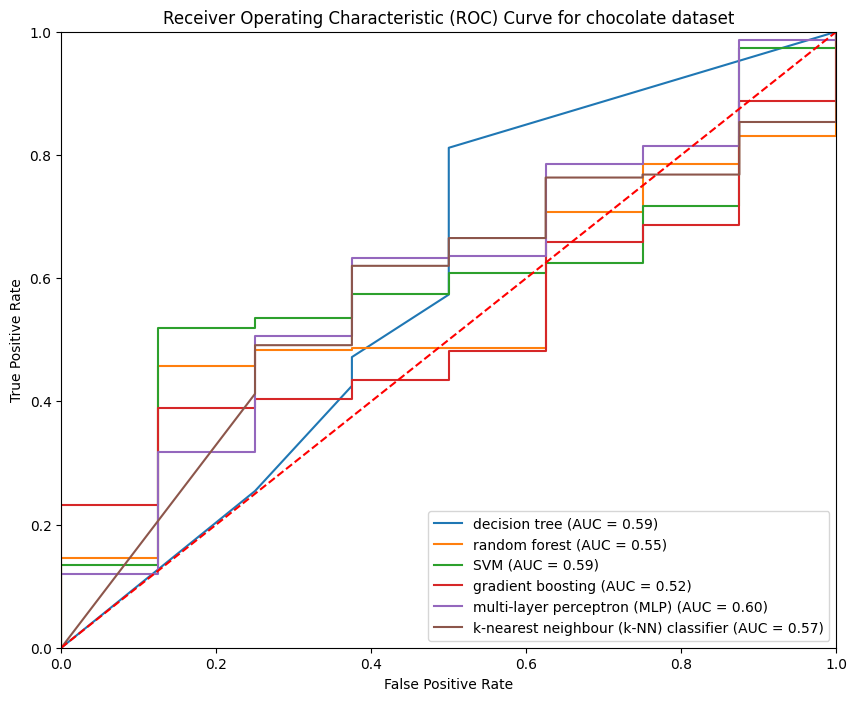

In [58]:
# plot the ROC and store the AUC for further analysis
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: chocoModels.decisionTree_clf,
        constants.randForest: chocoModels.randomForest_clf,
        constants.svm: chocoModels.svm_clf,
        constants.gradientBoost: chocoModels.gradientBoost_clf,
        constants.mlp: chocoModels.mlp_clf,
        constants.knn: chocoModels.knn_clf
    },
    X_test=chocoModels.X_test,
    y_test=chocoModels.y_test,
    dataset=constants.choco_dataset_fullname
);
AUCs_chocolate += currAUCs;

Load the Models trained by a combination of undersampled data and oversampled data.

In [59]:
# Models trained with combinedsampled data
choco_combinedsampled_decisionTree = unpack(constants.filepaths["choc_posttrained_combinedsampled_decisionTree"]);
choco_combinedsampled_randomForest = unpack(constants.filepaths["choc_posttrained_combinedsampled_randomForest"]);
choco_combinedsampled_SVC = unpack(constants.filepaths["choc_posttrained_combinedsampled_SVC"]);
choco_combinedsampled_gradientBoost = unpack(constants.filepaths["choc_posttrained_combinedsampled_gradientBoost"]);
choco_combinedsampled_MLP = unpack(constants.filepaths["choc_posttrained_combinedsampled_MLP"]);
choco_combinedsampled_KNN = unpack(constants.filepaths["choc_posttrained_combinedsampled_KNN"]);

### Mushrooms Dataset

Now we are addressing the class imbalance issue similarly based on the Mushrooms dataset.

First, we identify the majority class from the test set.

In [60]:
# mushrooms dataset
print(pd.Series(mushrooms_y_test).value_counts());

non-user    386
user        243
dtype: int64


Obviously, the `non-user` class is a majority class, while `user` is the minority class. But this time the numbers of labels from each class are more similar than that from the Chocolate dataset.

#### Undersample the majority class (from the training set)

In [61]:
mushrooms_X_train_underSample, mushrooms_y_train_underSample = underSample(
    X_train=mushModels.X_train, # use the normalized samples
    y_train=mushModels.y_train # use the normalized labels
);
print(f"Total Number of Samples: {len(mushrooms_X_train_underSample)}");
print(f"Total Number of Labels: {len(mushrooms_y_train_underSample)}");
print(f"Unique Labels: {np.unique(mushrooms_y_train_underSample)}");

Total Number of Samples: 81
Total Number of Labels: 81
Unique Labels: [0 1]


##### Employ the 6 models

In [62]:
# Change the training data for the models
mushModels.set_X_train(mushrooms_X_train_underSample);
mushModels.set_y_train(mushrooms_y_train_underSample);

In [63]:
# retrain all models with undersampled data
mushModels.train(
    dataset=constants.mushrooms_dataset,
    isSampled=constants.undersampled
);

Training all models
All models are completely trained.


In [64]:
# organize files into directories
organize();

Moved choc_model_decisionTree_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved choc_model_Gradient_Boosting_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved choc_model_KNN_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved choc_model_MLP_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved choc_model_randomForest_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved choc_model_SVC_RBF_posttrained_combinedsampled.pkl to ./choc\posttrained
Moved mushrooms_model_decisionTree_posttrained_undersampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_Gradient_Boosting_posttrained_undersampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_KNN_posttrained_undersampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_MLP_posttrained_undersampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_randomForest_posttrained_undersampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_SVC_RBF_posttrained_undersampled.pkl to ./mushroom

##### Make Predictions on the test set

In [65]:
# Decision Tree
print("Decision Tree");

mushrooms_y_pred_undersampled_decisionTree:np.ndarray = Models.predict(
    model=mushModels.decisionTree_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushroomss_undersampled_decisionTree = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_decisionTree,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushroomss_undersampled_decisionTree}");

# Evaluations
precision_mushrooms_decisionTree = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_decisionTree, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_decisionTree}");

recall_mushrooms_decisionTree = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_decisionTree, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_decisionTree, mushModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9862778730703259
Recall: 0.9259259259259259


Predicted,user,non-user,All
Actual,,,
user,575,46,621
non-user,8,0,8
All,583,46,629


In [66]:
# Random Forest
print("Random Forest");

mushrooms_y_pred_undersampled_randomForest:np.ndarray = Models.predict(
    model=mushModels.randomForest_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_undersampled_randomForest = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_randomForest,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_undersampled_randomForest}");

# Evaluations
precision_mushrooms_randomForest = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_randomForest, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_randomForest}");

recall_mushrooms_randomForest = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_randomForest, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_randomForest, mushModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9917525773195877
Recall: 0.7745571658615137


Predicted,user,non-user,All
Actual,,,
user,481,140,621
non-user,4,4,8
All,485,144,629


In [67]:
# SVM
print("SVM");

mushrooms_y_pred_undersampled_SVM:np.ndarray = Models.predict(
    model=mushModels.svm_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_undersampled_SVM = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_SVM,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_undersampled_SVM}");

# Evaluations
precision_mushrooms_SVM = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Precision: {precision_mushrooms_SVM}");

recall_mushrooms_SVM = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_SVM, 
    y_test=chocoModels.y_test);
print(f"Recall: {recall_mushrooms_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_SVM, mushModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9857397504456328
Recall: 0.8904991948470209


Predicted,user,non-user,All
Actual,,,
user,553,68,621
non-user,8,0,8
All,561,68,629


In [68]:
# Gradient Boosting
print("Gradient Boosting");

mushrooms_y_pred_undersampled_gradientBoost:np.ndarray = Models.predict(
    model=mushModels.gradientBoost_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_undersampled_gradientBoost = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_gradientBoost,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_undersampled_gradientBoost}");

# Evaluations
precision_mushrooms_gradientBoost = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_gradientBoost}");

recall_mushrooms_gradientBoost = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_gradientBoost, mushModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.989517819706499
Recall: 0.7600644122383253


Predicted,user,non-user,All
Actual,,,
user,472,149,621
non-user,5,3,8
All,477,152,629


In [69]:
# MLP
print("MLP");

mushrooms_y_pred_undersampled_MLP:np.ndarray = Models.predict(
    model=mushModels.mlp_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_undersampled_MLP = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_MLP,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_undersampled_MLP}");

# Evaluations
precision_mushrooms_MLP = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_MLP, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_MLP}");

recall_mushrooms_MLP = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_MLP, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_MLP, mushModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9859437751004017
Recall: 0.7906602254428341


Predicted,user,non-user,All
Actual,,,
user,491,130,621
non-user,7,1,8
All,498,131,629


In [70]:
# KNN
print("KNN");

mushrooms_y_pred_undersampled_KNN:np.ndarray = Models.predict(
    model=mushModels.knn_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_undersampled_KNN = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_undersampled_KNN,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_undersampled_KNN}");

# Evaluations
precision_muchrooms_KNN = performance.evalPrecision(
    y_pred=mushrooms_y_pred_undersampled_KNN, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_muchrooms_KNN}");

recall_mushrooms_KNN = performance.evalRecall(
    y_pred=mushrooms_y_pred_undersampled_KNN, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_undersampled_KNN, mushModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9861111111111112
Recall: 0.9146537842190016


Predicted,user,non-user,All
Actual,,,
user,568,53,621
non-user,8,0,8
All,576,53,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using undersampled data

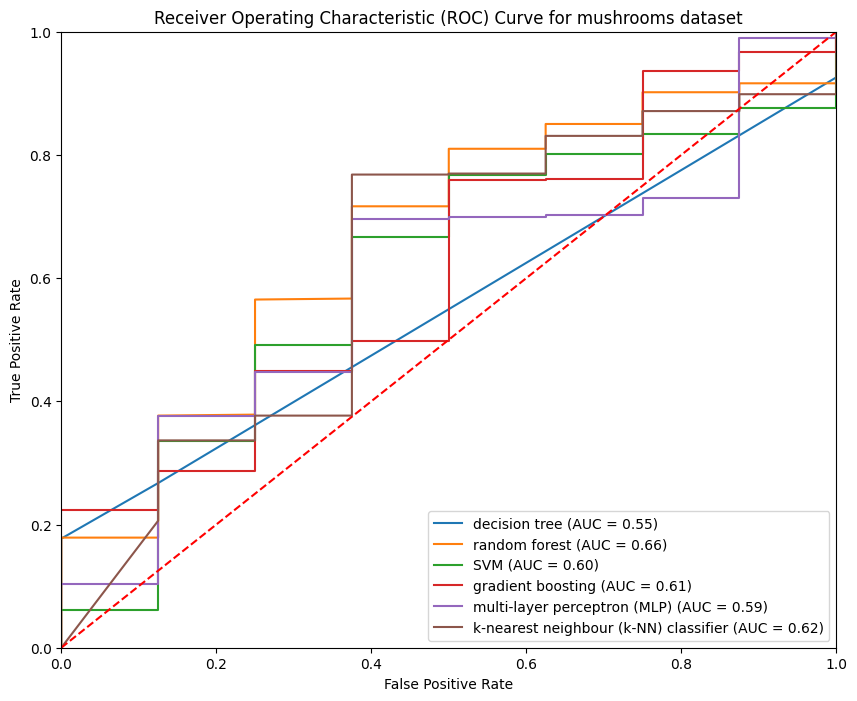

In [71]:
# plot the ROC and store the AUC for further analysis
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: mushModels.decisionTree_clf,
        constants.randForest: mushModels.randomForest_clf,
        constants.svm: mushModels.svm_clf,
        constants.gradientBoost: mushModels.gradientBoost_clf,
        constants.mlp: mushModels.mlp_clf,
        constants.knn: mushModels.knn_clf
    },
    X_test=mushModels.X_test,
    y_test=mushModels.y_test,
    dataset=constants.mushrooms_dataset
);
AUCs_mushrooms += currAUCs;

#### Oversample the minority class (from the training set)

In [72]:
mushrooms_X_train_overSample, mushrooms_y_train_overSample = overSample(
    X_train=mushModels.X_train, # use the normalized samples
    y_train=mushModels.y_train # use the normalized labels
);
print(f"Total Number of Samples: {len(mushrooms_X_train_overSample)}");
print(f"Total Number of Labels: {len(mushrooms_y_train_overSample)}");
print(f"Unique Labels: {np.unique(mushrooms_y_train_overSample)}");

Total Number of Samples: 108
Total Number of Labels: 108
Unique Labels: [0 1]


##### Employ the 6 models

In [73]:
# Change the training data for the models
mushModels.set_X_train(mushrooms_X_train_overSample);
mushModels.set_y_train(mushrooms_y_train_overSample);

In [74]:
# retrain all models with oversampled data
mushModels.train(
    dataset=constants.mushrooms_dataset,
    isSampled=constants.oversampled
);

Training all models
All models are completely trained.


In [75]:
# organize files into directories
organize();

Moved mushrooms_model_decisionTree_posttrained_oversampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_Gradient_Boosting_posttrained_oversampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_KNN_posttrained_oversampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_MLP_posttrained_oversampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_randomForest_posttrained_oversampled.pkl to ./mushrooms\posttrained
Moved mushrooms_model_SVC_RBF_posttrained_oversampled.pkl to ./mushrooms\posttrained
Organization complete!


##### Make Predictions on the test set

In [76]:
# Decision Tree
print("Decision Tree");

mushrooms_y_pred_oversampled_decisionTree:np.ndarray = Models.predict(
    model=mushModels.decisionTree_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_decisionTree = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_decisionTree,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_decisionTree}");

# Evaluations
precision_mushrooms_decisionTree = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_decisionTree, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_decisionTree}");

recall_mushrooms_decisionTree = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_decisionTree, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_decisionTree, mushModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9873096446700508
Recall: 0.6264090177133655


Predicted,user,non-user,All
Actual,,,
user,389,232,621
non-user,5,3,8
All,394,235,629


In [77]:
# Random Forest
print("Random Forest");

mushrooms_y_pred_oversampled_randomForest:np.ndarray = Models.predict(
    model=mushModels.randomForest_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_randomForest = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_randomForest,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_randomForest}");

# Evaluations
precision_mushrooms_randomForest = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_randomForest, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_randomForest}");

recall_mushrooms_randomForest = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_randomForest, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_randomForest, mushModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9878048780487805
Recall: 0.6521739130434783


Predicted,user,non-user,All
Actual,,,
user,405,216,621
non-user,5,3,8
All,410,219,629


In [78]:
# SVM
print("SVM");

mushrooms_y_pred_oversampled_SVM:np.ndarray = Models.predict(
    model=mushModels.svm_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_SVM = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_SVM,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_SVM}");

# Evaluations
precision_mushrooms_SVM = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_SVM, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_SVM}");

recall_mushrooms_SVM = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_SVM, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_SVM, mushModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.985655737704918
Recall: 0.7745571658615137


Predicted,user,non-user,All
Actual,,,
user,481,140,621
non-user,7,1,8
All,488,141,629


In [79]:
# Gradient Boosting
print("Gradient Boosting");

mushrooms_y_pred_oversampled_gradientBoost:np.ndarray = Models.predict(
    model=mushModels.gradientBoost_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_gradientBoost = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_gradientBoost,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_gradientBoost}");

# Evaluations
precision_mushrooms_gradientBoost = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_gradientBoost}");

recall_mushrooms_gradientBoost = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_gradientBoost, mushModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9858490566037735
Recall: 0.6731078904991948


Predicted,user,non-user,All
Actual,,,
user,418,203,621
non-user,6,2,8
All,424,205,629


In [80]:
# MLP
print("MLP");

mushrooms_y_pred_oversampled_MLP:np.ndarray = Models.predict(
    model=mushModels.mlp_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_MLP = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_MLP,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_MLP}");

# Evaluations
precision_mushrooms_MLP = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_MLP, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_MLP}");

recall_mushrooms_MLP = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_MLP, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_MLP, mushModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9893162393162394
Recall: 0.7455716586151369


Predicted,user,non-user,All
Actual,,,
user,463,158,621
non-user,5,3,8
All,468,161,629


In [81]:
# KNN
print("KNN");

mushrooms_y_pred_oversampled_KNN:np.ndarray = Models.predict(
    model=mushModels.knn_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_oversampled_KNN = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_oversampled_KNN,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_oversampled_KNN}");

# Evaluations
precision_mushrooms_KNN = performance.evalPrecision(
    y_pred=mushrooms_y_pred_oversampled_KNN, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_KNN}");

recall_mushrooms_KNN = performance.evalRecall(
    y_pred=mushrooms_y_pred_oversampled_KNN, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_oversampled_KNN, mushModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9905882352941177
Recall: 0.677938808373591


Predicted,user,non-user,All
Actual,,,
user,421,200,621
non-user,4,4,8
All,425,204,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using oversampled data

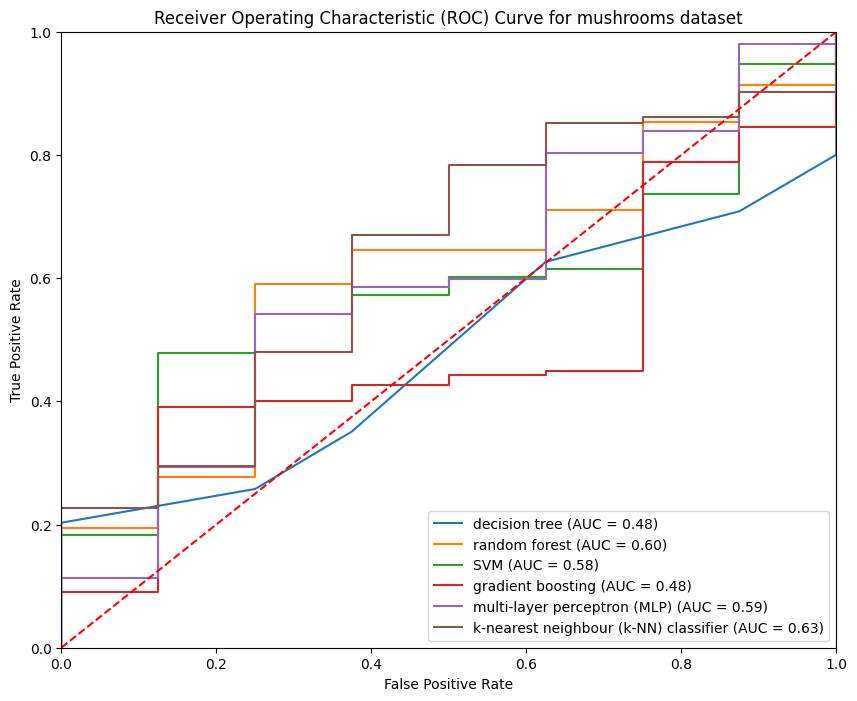

In [82]:
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: mushModels.decisionTree_clf,
        constants.randForest: mushModels.randomForest_clf,
        constants.svm: mushModels.svm_clf,
        constants.gradientBoost: mushModels.gradientBoost_clf,
        constants.mlp: mushModels.mlp_clf,
        constants.knn: mushModels.knn_clf
    },
    X_test=mushModels.X_test,
    y_test=mushModels.y_test,
    dataset=constants.mushrooms_dataset
);
AUCs_mushrooms += currAUCs;

Load the Models trained by undersampled data and oversampled data respectively.

In [83]:
# Models trained with undersampled data
mushrooms_undersampled_decisionTree = unpack(constants.filepaths["mushrooms_posttrained_undersampled_decisionTree"]);
mushroomsundersampled_randomForest = unpack(constants.filepaths["mushrooms_posttrained_undersampled_randomForest"]);
mushrooms_undersampled_SVC = unpack(constants.filepaths["mushrooms_posttrained_undersampled_SVC"]);
mushrooms_undersampled_gradientBoost = unpack(constants.filepaths["mushrooms_posttrained_undersampled_gradientBoost"]);
mushrooms_undersampled_MLP = unpack(constants.filepaths["mushrooms_posttrained_undersampled_MLP"]);
mushrooms_undersampled_KNN = unpack(constants.filepaths["mushrooms_posttrained_undersampled_KNN"]);
# Models trained with oversampled data
mushrooms_oversampled_decisionTree = unpack(constants.filepaths["mushrooms_posttrained_oversampled_decisionTree"]);
mushrooms_oversampled_randomForest = unpack(constants.filepaths["mushrooms_posttrained_oversampled_randomForest"]);
mushrooms_oversampled_SVC = unpack(constants.filepaths["mushrooms_posttrained_oversampled_SVC"]);
mushrooms_oversampled_gradientBoost = unpack(constants.filepaths["mushrooms_posttrained_oversampled_gradientBoost"]);
mushrooms_oversampled_MLP = unpack(constants.filepaths["mushrooms_posttrained_oversampled_MLP"]);
mushrooms_oversampled_KNN = unpack(constants.filepaths["mushrooms_posttrained_oversampled_KNN"]);

#### Training the model with combination of undersampling and oversampling

In [84]:
mushrooms_X_train_combined = np.concatenate((mushrooms_X_train_underSample, mushrooms_X_train_overSample));
mushrooms_y_train_combined = np.concatenate((mushrooms_y_train_underSample, mushrooms_y_train_overSample));
print(f"Total Number of Samples: {len(mushrooms_X_train_overSample)}");
print(f"Total Number of Labels: {len(mushrooms_y_train_overSample)}");
print(f"Unique Labels: {np.unique(mushrooms_y_train_overSample)}");
print(f"Shape of training samples array: {mushrooms_X_train_combined.shape}");
print(f"Shape of training labels array: {mushrooms_y_train_combined.shape}");

Total Number of Samples: 108
Total Number of Labels: 108
Unique Labels: [0 1]
Shape of training samples array: (189, 13)
Shape of training labels array: (189,)


##### Employ the 6 models

In [85]:
# Change the training data for the models
mushModels.set_X_train(mushrooms_X_train_combined);
mushModels.set_y_train(mushrooms_y_train_combined);

In [86]:
# retrain all models with oversampled data
mushModels.train(
    dataset=constants.mushrooms_dataset,
    isSampled=constants.combinedsampled
);

Training all models
All models are completely trained.


##### Make Predictions on the test set

In [87]:
# Decision Tree
print("Decision Tree");

mushrooms_y_pred_combined_decisionTree:np.ndarray = Models.predict(
    model=mushModels.decisionTree_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_decisionTree = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_decisionTree,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_decisionTree}");

# Evaluations
precision_mushrooms_decisionTree = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_decisionTree, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_decisionTree}");

recall_mushrooms_decisionTree = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_decisionTree, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_decisionTree}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_decisionTree, mushModels.y_test);
confMtx

Decision Tree
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9860335195530726
Recall: 0.5684380032206119


Predicted,user,non-user,All
Actual,,,
user,353,268,621
non-user,5,3,8
All,358,271,629


In [88]:
# Random Forest
print("Random Forest");

mushrooms_y_pred_combined_randomForest:np.ndarray = Models.predict(
    model=mushModels.randomForest_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_randomForest = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_randomForest,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_randomForest}");

# Evaluations
precision_mushrooms_randomForest = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_randomForest, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_randomForest}");

recall_mushrooms_randomForest = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_randomForest, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_randomForest}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_randomForest, mushModels.y_test);
confMtx

Random Forest
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9885844748858448
Recall: 0.6972624798711755


Predicted,user,non-user,All
Actual,,,
user,433,188,621
non-user,5,3,8
All,438,191,629


In [89]:
# SVM
print("SVM");

mushrooms_y_pred_combined_SVM:np.ndarray = Models.predict(
    model=mushModels.svm_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_SVM = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_SVM,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_SVM}");

# Evaluations
precision_mushrooms_SVM = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_SVM, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_SVM}");

recall_mushrooms_SVM = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_SVM, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_SVM}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_SVM, mushModels.y_test);
confMtx

SVM
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9852941176470589
Recall: 0.7552334943639292


Predicted,user,non-user,All
Actual,,,
user,469,152,621
non-user,7,1,8
All,476,153,629


In [90]:
# Gradient Boosting
print("Gradient Boosting");

mushrooms_y_pred_combined_gradientBoost:np.ndarray = Models.predict(
    model=mushModels.gradientBoost_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_gradientBoost = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_gradientBoost,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_gradientBoost}");

# Evaluations
precision_mushrooms_gradientBoost = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_gradientBoost}");

recall_mushrooms_gradientBoost = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_gradientBoost, 
    y_test=mushModels.y_test);
print(f"Recall: {precision_mushrooms_gradientBoost}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_gradientBoost, mushModels.y_test);
confMtx

Gradient Boosting
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9861111111111112
Recall: 0.9861111111111112


Predicted,user,non-user,All
Actual,,,
user,426,195,621
non-user,6,2,8
All,432,197,629


In [91]:
# MLP
print("MLP");

mushrooms_y_pred_combined_MLP:np.ndarray = Models.predict(
    model=mushModels.mlp_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_MLP = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_MLP,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_MLP}");

# Evaluations
precision_mushrooms_MLP = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_MLP, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_MLP}");

recall_mushrooms_MLP = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_MLP, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_MLP}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_MLP, mushModels.y_test);
confMtx

MLP
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9894736842105263
Recall: 0.7568438003220612


Predicted,user,non-user,All
Actual,,,
user,470,151,621
non-user,5,3,8
All,475,154,629


In [92]:
# KNN
print("KNN");

mushrooms_y_pred_combined_KNN:np.ndarray = Models.predict(
    model=mushModels.knn_clf, 
    X_test=mushModels.X_test,
    y_test=mushModels.y_test
);

print(f"Total Number of Samples: {len(mushrooms_X_test)}");
print(f"Total Number of Labels: {len(mushrooms_y_test)}");
totalPred_mushrooms_combined_KNN = performance.evalPredictionNum(
    y_pred=mushrooms_y_pred_combined_KNN,
    y_test=mushModels.y_test
)
print(f"Total Number of Predictions made: {totalPred_mushrooms_combined_KNN}");

# Evaluations
precision_mushrooms_KNN = performance.evalPrecision(
    y_pred=mushrooms_y_pred_combined_KNN, 
    y_test=mushModels.y_test);
print(f"Precision: {precision_mushrooms_KNN}");

recall_mushrooms_KNN = performance.evalRecall(
    y_pred=mushrooms_y_pred_combined_KNN, 
    y_test=mushModels.y_test);
print(f"Recall: {recall_mushrooms_KNN}");


# 'user' is a positive class
confMtx = performance.printConfMtx(mushrooms_y_pred_combined_KNN, mushModels.y_test);
confMtx

KNN
Total Number of Samples: 629
Total Number of Labels: 629
Total Number of Predictions made: 629
Precision: 0.9889624724061811
Recall: 0.7214170692431562


Predicted,user,non-user,All
Actual,,,
user,448,173,621
non-user,5,3,8
All,453,176,629


##### Plot the ROC curve to summarize the performance of all the models in a pipeline using a combination of undersampled and oversampled data

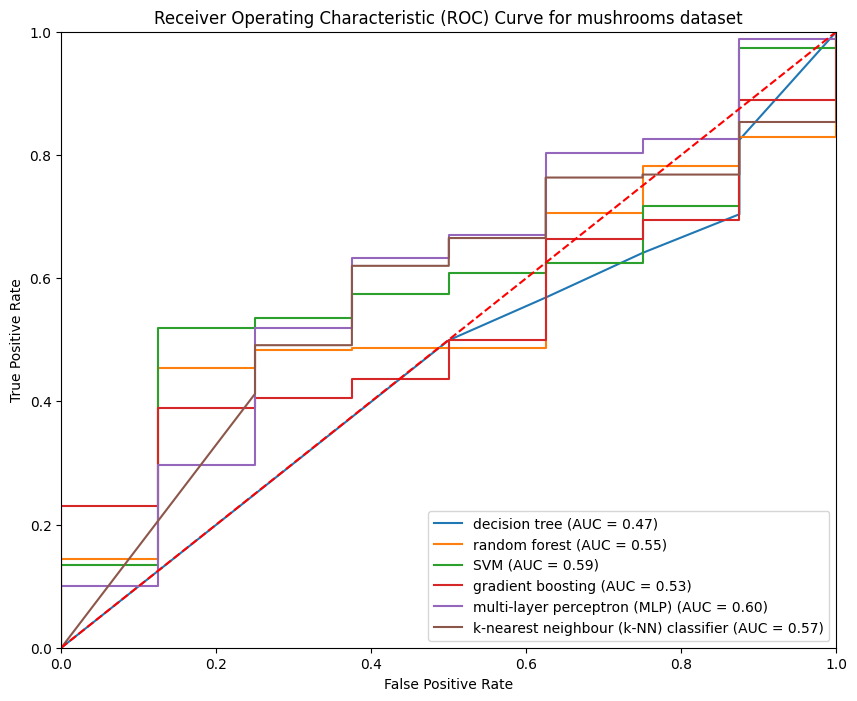

In [93]:
currAUCs = performance.plotROC(
    models={
        constants.descisionTree: mushModels.decisionTree_clf,
        constants.randForest: mushModels.randomForest_clf,
        constants.svm: mushModels.svm_clf,
        constants.gradientBoost: mushModels.gradientBoost_clf,
        constants.mlp: mushModels.mlp_clf,
        constants.knn: mushModels.knn_clf
    },
    X_test=mushModels.X_test,
    y_test=mushModels.y_test,
    dataset=constants.mushrooms_dataset
);
AUCs_mushrooms += currAUCs;

Load the Models trained by a combination of undersampled data and oversampled data.

In [94]:
# Models trained with combinedsampled data
mushrooms_combinedsampled_decisionTree = unpack(constants.filepaths["choc_posttrained_combinedsampled_decisionTree"]);
choco_combinedsampled_randomForest = unpack(constants.filepaths["choc_posttrained_combinedsampled_randomForest"]);
choco_combinedsampled_SVC = unpack(constants.filepaths["choc_posttrained_combinedsampled_SVC"]);
choco_combinedsampled_gradientBoost = unpack(constants.filepaths["choc_posttrained_combinedsampled_gradientBoost"]);
choco_combinedsampled_MLP = unpack(constants.filepaths["choc_posttrained_combinedsampled_MLP"]);
choco_combinedsampled_KNN = unpack(constants.filepaths["choc_posttrained_combinedsampled_KNN"]);

## Conclusion and Further Analysis

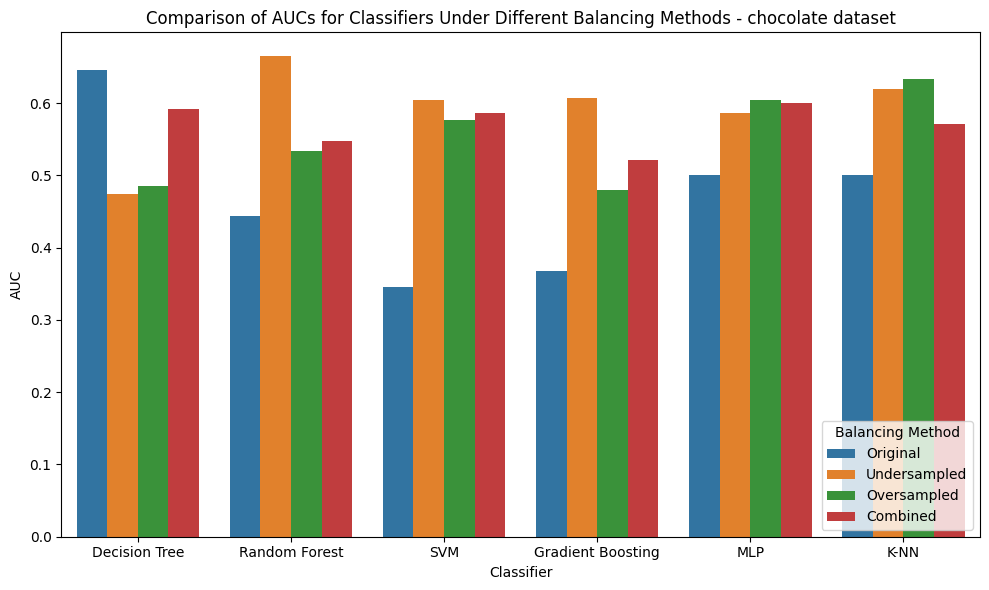

In [95]:
# chocolate dataset
data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'MLP', 'K-NN'] * 4,
    'AUC': AUCs_chocolate,
    'Method': ['Original', 'Original', 'Original', 'Original', 'Original', 'Original',
               'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled',
               'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled',
               'Combined', 'Combined', 'Combined', 'Combined', 'Combined', 'Combined']
}
performance.plotAUC_comparison(
    plotData = data,
    dataset=constants.choco_dataset_fullname
);

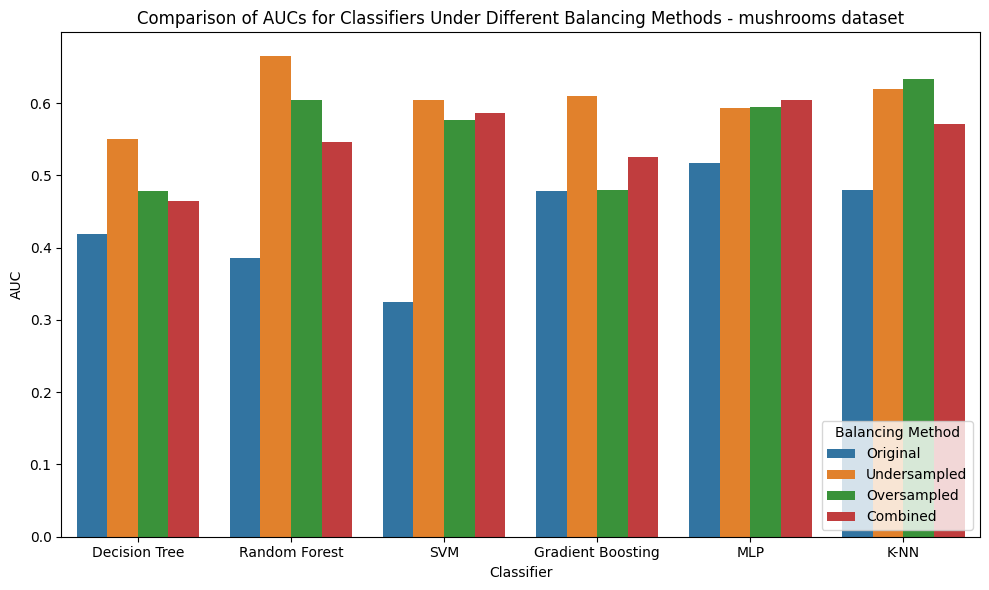

In [98]:
# mushrooms dataset
data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'MLP', 'K-NN'] * 4,
    'AUC': AUCs_mushrooms,
    'Method': ['Original', 'Original', 'Original', 'Original', 'Original', 'Original',
               'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled', 'Undersampled',
               'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled', 'Oversampled',
               'Combined', 'Combined', 'Combined', 'Combined', 'Combined', 'Combined']
}
performance.plotAUC_comparison(
    plotData = data,
    dataset=constants.mushrooms_dataset
);